In [68]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, balanced_accuracy_score, f1_score, classification_report, jaccard_score, roc_auc_score, confusion_matrix, auc, roc_curve
from sklearn.multiclass import OneVsRestClassifier
import joblib
from sklearn.utils import resample

In [4]:
pd.options.display.max_rows = 350
pd.options.display.max_columns = 350

In [6]:
data = pd.read_csv('ss_spinal.csv')
df = pd.DataFrame(data)
df

,PI,PT,LL,SS,PR,DS,class,class_en
0,0.164240,0.498279,-0.664761,-0.175771,-1.449185,-0.837551,Hernia,0
1,-1.264501,-0.751533,-1.451360,-1.082763,-0.266700,-0.677915,Hernia,0
2,0.510189,0.464851,-0.099726,0.309224,-0.899585,-0.946078,Hernia,0
3,0.537904,0.708418,-0.411318,0.153619,-1.208999,-0.457699,Hernia,0
4,-0.629374,-0.792446,-1.273382,-0.208517,-0.735462,-0.566793,Hernia,0
5,-1.193379,-0.365240,-1.445454,-1.293539,0.930062,-0.755224,Hernia,0
6,-0.407646,-0.170895,-0.796448,-0.405428,0.196455,-0.630730,Hernia,0
7,-0.888416,-0.682035,-1.234523,-0.639100,-0.051388,-1.182802,Hernia,0
8,-0.982384,-0.404075,-0.498659,-0.983171,0.529826,-0.388874,Hernia,0
9,-1.405796,-1.256808,-0.538656,-0.871052,-2.533884,-0.807111,Hernia,0


In [195]:
#Membagi input features dan target
x = df.iloc[:,:-2]
y = df['class']

In [196]:
#setting up train and test sets
xtr, xts, ytr, yts = train_test_split(x, y, test_size=0.20, random_state=21)

In [197]:
print(xtr.shape)
print(ytr.shape)
print(xts.shape)
print(yts.shape)

(247, 6)
(247,)
(62, 6)
(62,)


In [199]:
print(len(ytr[ytr=='Hernia']))
print(len(ytr[ytr=='Normal']))
print(len(ytr[ytr=='Spondylolisthesis']))

49
79
119


In [502]:
xts

,PI,PT,LL,SS,PR,DS
156,-0.956977,-1.607372,-0.314347,0.000753,-0.700824,0.589135
239,-1.110130,-0.874141,-0.857568,-0.781303,-0.105121,-1.029703
104,1.021425,1.183033,0.608522,0.419781,0.037353,2.270528
251,-1.034367,-2.343063,0.326503,0.479138,0.274574,-0.940504
138,1.479545,0.349933,2.144799,1.684974,-0.668298,0.430858
55,-0.751867,-0.429726,-0.822641,-0.657336,-1.480989,-0.621306
165,-0.195550,-1.070390,0.273088,0.586062,-0.599470,0.390350
91,0.636590,0.258889,0.588407,0.639433,-0.133475,0.248301
290,-0.547898,-0.336422,-0.861920,-0.460633,-0.161602,-0.600366
265,-0.828376,-0.736034,-0.498163,-0.516866,0.247575,-0.847080


In [503]:
yts

156    Spondylolisthesis
239               Normal
104    Spondylolisthesis
251               Normal
138    Spondylolisthesis
55                Hernia
165    Spondylolisthesis
91     Spondylolisthesis
290               Normal
265               Normal
134    Spondylolisthesis
59                Hernia
24                Hernia
136    Spondylolisthesis
70     Spondylolisthesis
259               Normal
119    Spondylolisthesis
116    Spondylolisthesis
4                 Hernia
93     Spondylolisthesis
249               Normal
179    Spondylolisthesis
242               Normal
176    Spondylolisthesis
186    Spondylolisthesis
61     Spondylolisthesis
115    Spondylolisthesis
159    Spondylolisthesis
232               Normal
191    Spondylolisthesis
258               Normal
16                Hernia
304               Normal
155    Spondylolisthesis
102    Spondylolisthesis
200    Spondylolisthesis
52                Hernia
185    Spondylolisthesis
234               Normal
106    Spondylolisthesis


In [200]:
#Gabungkan training data
train = pd.concat([xtr, ytr], axis=1)
train

,PI,PT,LL,SS,PR,DS,class
270,-1.058353,-0.103172,-0.535893,-1.321501,0.201297,-0.568177,Normal
9,-1.405796,-1.256808,-0.538656,-0.871052,-2.533884,-0.807111,Hernia
130,0.566752,-0.379691,0.326503,1.051141,0.073426,-0.235636,Spondylolisthesis
72,1.472311,1.545685,0.480649,0.731099,0.579180,1.633451,Spondylolisthesis
60,0.840728,1.448828,1.446109,-0.029652,1.924665,1.030259,Spondylolisthesis
209,-1.297382,-0.060842,-0.907111,-1.671791,0.727500,-0.564534,Normal
37,-1.464380,0.187184,-1.683958,-2.089032,1.472185,-0.837852,Hernia
266,-0.441663,-0.816629,-0.267039,0.059415,0.386143,-0.767614,Normal
40,-1.476957,-0.587379,-1.959366,-1.494032,-0.827902,-0.943761,Hernia
279,-0.607125,-0.414452,-0.942430,-0.477525,0.088756,-0.726772,Normal


In [204]:
#Pisahkan seluruh class
normal = train[train['class']=='Normal']
hernia = train[train['class']=='Hernia']
spondy = train[train['class']=='Spondylolisthesis']


In [205]:
#unsample hernia to normal
hernia_unsampled = resample(normal,
                            replace=True,
                            n_samples=len(normal),
                            random_state=21)
len(hernia_unsampled)

unsampled = pd.concat([normal, hernia])
unsampled

,PI,PT,LL,SS,PR,DS,class
270,-1.058353,-0.103172,-0.535893,-1.321501,0.201297,-0.568177,Normal
209,-1.297382,-0.060842,-0.907111,-1.671791,0.727500,-0.564534,Normal
266,-0.441663,-0.816629,-0.267039,0.059415,0.386143,-0.767614,Normal
279,-0.607125,-0.414452,-0.942430,-0.477525,0.088756,-0.726772,Normal
282,-0.672104,-0.446091,-0.003713,-0.538677,0.634699,-0.811384,Normal
224,-0.032551,-0.985267,0.183317,0.734916,0.542703,-0.721946,Normal
275,-0.533258,-0.394323,-1.007054,-0.395501,1.003589,-0.769860,Normal
280,0.237772,-0.307614,-0.433349,0.558118,-0.192827,-0.631959,Normal
216,-1.319953,-1.102054,-0.080706,-0.879466,1.064371,-0.619146,Normal
301,-0.338066,0.391863,-1.217174,-0.757602,0.029280,-0.877858,Normal


In [206]:
#downsample spondylolisthesis to normal
spondy_downsampled = resample(spondy,
                                replace=False,
                                n_samples=len(normal),
                                random_state=21)

resampled = pd.concat([unsampled, spondy_downsampled])
resampled
print(resampled.shape)

(207, 7)


In [208]:
ytr_re = resampled['class']
xtr_re = resampled.iloc[:,:-1]

### Comparation tts and resampling

### - Splitting

In [509]:
lr = LogisticRegression(solver='liblinear', multi_class='ovr')
lr.fit(xtr,ytr)
tts_pred = lr.predict(xts)
tts_pred

array(['Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Normal',
       'Spondylolisthesis', 'Hernia', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal', 'Normal', 'Spondylolisthesis',
       'Normal', 'Hernia', 'Spondylolisthesis', 'Spondylolisthesis',
       'Normal', 'Spondylolisthesis', 'Spondylolisthesis', 'Hernia',
       'Spondylolisthesis', 'Normal', 'Normal', 'Normal',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Spondylolisthesis', 'Spondylolisthesis', 'Normal',
       'Spondylolisthesis', 'Normal', 'Normal', 'Normal',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Hernia', 'Spondylolisthesis', 'Normal', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal', 'Hernia', 'Normal', 'Normal',
       'Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Normal',
       'Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Hernia',
       'Normal', 'Spondylolisthesis', 'Normal', 'Hernia', 'Normal',
       

In [210]:
print(lr.score(xtr,ytr))
print(lr.score(xts,yts))

0.8623481781376519
0.8709677419354839


In [510]:
yp_split = lr.predict(xts)
yp_split

array(['Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Normal',
       'Spondylolisthesis', 'Hernia', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal', 'Normal', 'Spondylolisthesis',
       'Normal', 'Hernia', 'Spondylolisthesis', 'Spondylolisthesis',
       'Normal', 'Spondylolisthesis', 'Spondylolisthesis', 'Hernia',
       'Spondylolisthesis', 'Normal', 'Normal', 'Normal',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Spondylolisthesis', 'Spondylolisthesis', 'Normal',
       'Spondylolisthesis', 'Normal', 'Normal', 'Normal',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Hernia', 'Spondylolisthesis', 'Normal', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal', 'Hernia', 'Normal', 'Normal',
       'Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Normal',
       'Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Hernia',
       'Normal', 'Spondylolisthesis', 'Normal', 'Hernia', 'Normal',
       

### Confusion Matrix Splitting

In [512]:
split_cm = confusion_matrix(yts, yp_split)
dfSplitCM = pd.DataFrame(split_cm, columns=['Hernia','Normal','Spondylolisthesis'], index=['Hernia','Normal','Spondylolisthesis'])
dfSplitCM

,Hernia,Normal,Spondylolisthesis
Hernia,6,5,0
Normal,2,19,0
Spondylolisthesis,0,1,29


(3, -0.05)

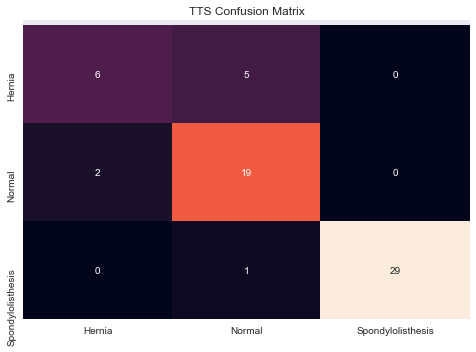

In [523]:
plt.title("TTS Confusion Matrix")
sb.heatmap(dfSplitCM, annot=True, fmt='d', cbar=False)
plt.ylim(3,-0.05)

In [513]:
### Hernia
tp_split_0 = 6
tn_split_0 = 49
fp_split_0 = 2
fn_split_0 = 5

### Normal
tp_split_1 = 19
tn_split_1 = 35
fp_split_1 = 6
fn_split_1 = 2

### Spondylolisthesis
tp_split_2 = 29
tn_split_2 = 32
fp_split_2 = 0
fn_split_2 = 1

In [514]:
accSplit_hernia = round((tp_split_0+tn_split_0)/len(xts)*100,2)
accSplit_normal = round((tp_split_1+tn_split_1)/len(xts)*100,2)
accSplit_spondy = round((tp_split_2+tn_split_2)/len(xts)*100,2)

print(f'Accuracy Score (Hernia) of Splitting: {accSplit_hernia} %')
print(f'Accuracy Score (Normal) of Splitting: {accSplit_normal} %')
print(f'Accuracy Score (Spondylolisthesis) of Splitting: {accSplit_spondy} %')

Accuracy Score (Hernia) of Splitting: 88.71 %
Accuracy Score (Normal) of Splitting: 87.1 %
Accuracy Score (Spondylolisthesis) of Splitting: 98.39 %


### - Resample

In [212]:
lr_re = LogisticRegression(solver='liblinear', multi_class='ovr')
lr_re.fit(xtr_re,ytr_re)
re_pred = lr_re.predict(xts)
re_pred

array(['Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Normal',
       'Spondylolisthesis', 'Hernia', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal', 'Normal', 'Spondylolisthesis',
       'Normal', 'Hernia', 'Spondylolisthesis', 'Spondylolisthesis',
       'Normal', 'Spondylolisthesis', 'Spondylolisthesis', 'Hernia',
       'Spondylolisthesis', 'Normal', 'Normal', 'Normal',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Spondylolisthesis', 'Spondylolisthesis', 'Normal',
       'Spondylolisthesis', 'Normal', 'Normal', 'Normal',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Hernia', 'Spondylolisthesis', 'Normal', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal', 'Hernia', 'Normal', 'Normal',
       'Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Normal',
       'Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Hernia',
       'Normal', 'Spondylolisthesis', 'Normal', 'Hernia', 'Normal',
       

In [213]:
print(lr_re.score(xtr_re,ytr_re))
print(lr_re.score(xts, yts))

0.8502415458937198
0.8709677419354839


In [515]:
yp_re = lr_re.predict(x_test)
yp_re

array(['Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Normal',
       'Spondylolisthesis', 'Hernia', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal', 'Normal', 'Spondylolisthesis',
       'Normal', 'Hernia', 'Spondylolisthesis', 'Spondylolisthesis',
       'Normal', 'Spondylolisthesis', 'Spondylolisthesis', 'Hernia',
       'Spondylolisthesis', 'Normal', 'Normal', 'Normal',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Spondylolisthesis', 'Spondylolisthesis', 'Normal',
       'Spondylolisthesis', 'Normal', 'Normal', 'Normal',
       'Spondylolisthesis', 'Spondylolisthesis', 'Spondylolisthesis',
       'Hernia', 'Spondylolisthesis', 'Normal', 'Spondylolisthesis',
       'Spondylolisthesis', 'Normal', 'Hernia', 'Normal', 'Normal',
       'Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Normal',
       'Spondylolisthesis', 'Normal', 'Spondylolisthesis', 'Hernia',
       'Normal', 'Spondylolisthesis', 'Normal', 'Hernia', 'Normal',
       

### Confusion Matrix Resampled

In [518]:
re_cm = confusion_matrix(yts, yp_re)
dfReCM = pd.DataFrame(re_cm, columns=['Hernia','Normal','Spondylolisthesis'], index=['Hernia','Normal','Spondylolisthesis'])
dfReCM

,Hernia,Normal,Spondylolisthesis
Hernia,6,5,0
Normal,2,19,0
Spondylolisthesis,0,1,29


(3, -0.05)

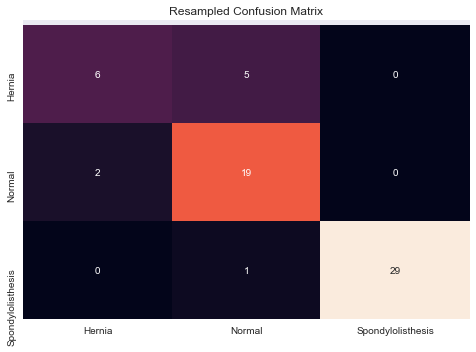

In [525]:
plt.title("Resampled Confusion Matrix")
sb.heatmap(dfReCM, annot=True, fmt='d', cbar=False)
plt.ylim(3,-0.05)

In [520]:
### Hernia
tp_re_0 = 6
tn_re_0 = 49
fp_re_0 = 2
fn_re_0 = 5

### Normal
tp_re_1 = 19
tn_re_1 = 35
fp_re_1 = 6
fn_re_1 = 2

### Spondylolisthesis
tp_re_2 = 29
tn_re_2 = 32
fp_re_2 = 0
fn_re_2 = 1

In [521]:
accRe_hernia = round((tp_re_0+tn_re_0)/len(xts)*100,2)
accRe_normal = round((tp_re_1+tn_re_1)/len(xts)*100,2)
accRe_spondy = round((tp_re_2+tn_re_2)/len(xts)*100,2)

print(f'Accuracy Score (Hernia) of Resampled: {accRe_hernia} %')
print(f'Accuracy Score (Normal) of Resampled: {accRe_normal} %')
print(f'Accuracy Score (Spondylolisthesis) of Resampled: {accRe_spondy} %')

Accuracy Score (Hernia) of Resampled: 88.71 %
Accuracy Score (Normal) of Resampled: 87.1 %
Accuracy Score (Spondylolisthesis) of Resampled: 98.39 %


In [215]:
cv_tts = cross_val_score(lr, xtr, ytr, cv=15)
print(cv_tts)
print(np.mean(cv_tts))

[0.88235294 0.88235294 0.52941176 0.82352941 0.70588235 0.94117647
 0.82352941 0.8125     0.8125     0.9375     0.9375     0.9375
 0.8125     0.8125     1.        ]
0.8433823529411765


In [216]:
cv_re = cross_val_score(lr_re, xtr_re, ytr_re, cv=15)
print(cv_re)
np.mean(cv_tts)

[0.85714286 0.78571429 0.71428571 0.78571429 0.71428571 1.
 0.78571429 0.85714286 0.85714286 0.92857143 0.92857143 1.
 0.76923077 0.69230769 0.92307692]


0.8433823529411765

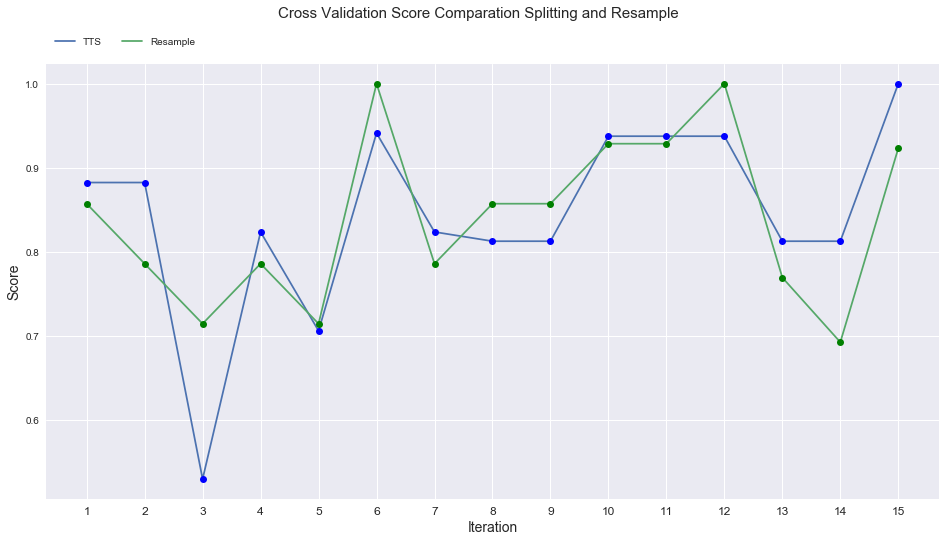

In [217]:
iterasi = [*range(1,16,1)]
plt.style.use('seaborn')
plt.figure(figsize=(16,8))
plt.grid('True')
plt.plot(iterasi, cv_tts, label='TTS')
plt.plot(iterasi, cv_re, label='Resample')
plt.plot(iterasi, cv_tts, 'bo')
plt.plot(iterasi, cv_re, 'go')
plt.xlabel('Iteration',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.suptitle('Cross Validation Score Comparation Splitting and Resample',fontsize=15)
plt.xticks(iterasi,fontsize=12)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2)

### Dari percobaan di atas, maka akan dipilih metode train test split karena tts lebih stabil dalam iterasi nilai cv dan train score didapati lebih baik.

## Modeling
### - Logistic Regression

In [219]:
#Logistic Regression Default
lrDef = LogisticRegression().fit(xtr,ytr)
lrDef

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [218]:
#Logistic Regression Parameter
penalty = ['l1','l2','elasticnet','none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
max_iter = np.arange(10,10001)
# c = np.logspace(0.1,10,20)
verbose = np.arange(11)
multi_class = ['auto', 'ovr', 'multinominal']
paramLR = {
    'penalty': penalty, 'solver': solver, 'max_iter': max_iter, 'multi_class': multi_class, 'verbose': verbose, 'multi_class': multi_class
}
paramLR

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'max_iter': array([   10,    11,    12, ...,  9998,  9999, 10000]),
 'multi_class': ['auto', 'ovr', 'multinominal'],
 'verbose': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}

In [220]:
lr = LogisticRegression()
rsLR = RandomizedSearchCV(estimator=lr, param_distributions=paramLR, cv=10, n_iter=15, random_state=21)
rsLR.fit(xtr,ytr)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out o

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   param_distributions={'max_iter': array([   10,    11,    12, ...,  9998,  9999, 10000]),
                                        'multi_class': ['auto', 'ovr',
                                                        'multinominal'],
                            

In [221]:
rsLR.best_params_

{'verbose': 3,
 'solver': 'lbfgs',
 'penalty': 'l2',
 'multi_class': 'auto',
 'max_iter': 880}

In [222]:
#Logistic Regression Best Parameters
lrRS = LogisticRegression(verbose=3, solver='lbfgs', penalty='l2', multi_class='auto', max_iter=880)
lrRS.fit(xtr,ytr)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=880,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=3,
                   warm_start=False)

In [227]:
#Score Default LR
lr_train_score = round(lrDef.score(xtr,ytr)*100,2)
lr_test_score = round(lrDef.score(xts,yts)*100,2)

print(f'Default Logistic Regression Train Score: {lr_train_score} %')
print(f'Default Logistic Regression Train Score: {lr_test_score} %')

Default Logistic Regression Train Score: 85.83 %
Default Logistic Regression Train Score: 87.1 %


In [228]:
#Score RS LR
lrRS_train_score = round(lrRS.score(xtr,ytr)*100,2)
lrRS_test_score = round(lrRS.score(xts,yts)*100,2)

print(f'Hyperparameter Logistic Regression Train Score: {lrRS_train_score} %')
print(f'Hyperparameter Logistic Regression Train Score: {lrRS_test_score} %')

Hyperparameter Logistic Regression Train Score: 85.83 %
Hyperparameter Logistic Regression Train Score: 87.1 %


In [230]:
diff_score_train_LR = lrRS_train_score-lr_train_score
diff_score_test_LR = lrRS_test_score-lr_test_score

print(f"Increament LR Train Score: {round(diff_score_train_LR,2)} %")
print(f"Increament LR Test Score: {round(diff_score_test_LR,2)} %")

Increament LR Train Score: 0.0 %
Increament LR Test Score: 0.0 %


### - Gaussian Naive Bayes

In [231]:
#Gaussian Naive Bayes
gnbDef = GaussianNB()
gnbDef.fit(xtr,ytr)

GaussianNB(priors=None, var_smoothing=1e-09)

In [233]:
#Score Default GNB
gnb_train_score = round(gnbDef.score(xtr,ytr)*100,2)
gnb_test_score = round(gnbDef.score(xts,yts)*100,2)

print(f'Gaussian NB train score: {gnb_train_score} %')
print(f'Gaussian NB test score: {gnb_test_score} %')

Gaussian NB train score: 83.0 %
Gaussian NB test score: 87.1 %


### - KNearest Neighbors

In [234]:
#Default KNN
kncDef = KNeighborsClassifier().fit(xtr, ytr)
kncDef

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [235]:
#parameter KNN
n_neighbors = np.arange(1,51,2)
leaf_size = np.arange(51)
weights = ['uniform','distance']  
algorithm = ['auto','ball_tree','kd_tree','brute']
p = np.arange(1,7)
paramKNN = {
    'n_neighbors': n_neighbors, 'leaf_size': leaf_size, 'algorithm': algorithm, 'weights': weights, 'p': p
    }
paramKNN


{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39, 41, 43, 45, 47, 49]),
 'leaf_size': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'weights': ['uniform', 'distance'],
 'p': array([1, 2, 3, 4, 5, 6])}

In [237]:
knc = KNeighborsClassifier()
rsKNC = RandomizedSearchCV(estimator=knc, param_distributions=paramKNN, cv=15, n_iter=15, random_state=21)
rsKNC.fit(xtr,ytr)

RandomizedSearchCV(cv=15, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13...
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
                                        'n_neighbor

In [238]:
rsKNC.best_params_

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 25,
 'leaf_size': 5,
 'algorithm': 'auto'}

In [239]:
kncRS = KNeighborsClassifier(weights= 'uniform', p= 2, n_neighbors=25, leaf_size=5, algorithm='auto')
kncRS.fit(xtr,ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=25, p=2,
                     weights='uniform')

In [242]:
#Score Default KNC
knc_train_score = round(kncDef.score(xtr,ytr)*100,2)
knc_test_score = round(kncDef.score(xts,yts)*100,2)

print(f'Default KNN Train Score: {knc_train_score} %')
print(f'Default KNN Test Score: {knc_test_score} %')

Default KNN Train Score: 85.43 %
Default KNN Test Score: 85.48 %


In [246]:
#Score RS KNC
kncRS_train_score = round(kncRS.score(xtr,ytr)*100,2)
kncRS_test_score = round(kncRS.score(xts,yts)*100,2)

print(f'Hyperparameter KNN Train Score: {kncRS_train_score} %')
print(f'Hyperparameter KNN Test Score: {kncRS_test_score} %')

Hyperparameter KNN Train Score: 80.16 %
Hyperparameter KNN Test Score: 85.48 %


In [245]:
diff_score_train_KNC = kncRS_train_score-knc_train_score
diff_score_test_KNC = kncRS_test_score-knc_train_score

print(f"Decreament KNN Train Score: {round(diff_score_train_KNC,2)} %")
print(f"Increament KNN Test Score: {round(diff_score_test_KNC,2)} %")

Decreament KNN Train Score: -5.27 %
Increament KNN Test Score: 0.05 %


### - Decision Tree

In [248]:
#Default DTC
dtcDef = DecisionTreeClassifier().fit(xtr,ytr)
dtcDef

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [247]:
#parameter Decision Tree
criterion = ['gini','entropy']
splitter = ['best', 'random']
max_features = ['auto','sqrt','log2']
max_depth = [np.linspace(10,110,11),None]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
paramDTC = {
    'criterion': criterion, 'splitter': splitter, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf
}
paramDTC

{'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100., 110.]),
  None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]}

In [250]:
dtc = DecisionTreeClassifier()
rsDTC = RandomizedSearchCV(estimator=dtc, param_distributions=paramDTC, cv=15, n_iter=15, random_state=21)
rsDTC.fit(xtr,ytr)

RandomizedSearchCV(cv=15, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
         

In [251]:
rsDTC.best_params_

{'splitter': 'best',
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'entropy'}

In [252]:
dtcRS = DecisionTreeClassifier(splitter='best', min_samples_split=10, min_samples_leaf=4, max_features='sqrt', max_depth=None, criterion='entropy')
dtcRS.fit(xtr,ytr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [257]:
#Default DTC Score
dtc_train_score = round(dtcDef.score(xtr,ytr)*100,2)
dtc_test_score = round(dtcDef.score(xts,yts)*100,2)

print(f'Default Decision Tree Train Score: {dtc_train_score} %')
print(f'Default Decision Tree Test Score: {dtc_test_score} %')

Default Decision Tree Train Score: 100.0 %
Default Decision Tree Test Score: 77.42 %


In [258]:
#Hyperparameter DTC Score
dtcRS_train_score = round(dtcRS.score(xtr,ytr)*100,2)
dtcRS_test_score = round(dtcRS.score(xts,yts)*100,2)

print(f'Hyperparameter Decision Tree Train Score: {dtcRS_train_score} %')
print(f'Hyperparameter Decision Tree Test Score: {dtcRS_test_score} %')

Hyperparameter Decision Tree Train Score: 91.9 %
Hyperparameter Decision Tree Test Score: 79.03 %


In [255]:
diff_score_train_DTC = dtcRS_train_score - dtc_train_score
diff_score_test_DTC = dtcRS_test_score - dtc_test_score

print(f"Decreament DTC Train Score: {round(diff_score_train_DTC,2)} %")
print(f"Increament DTC Test Score: {round(diff_score_test_DTC,2)} %")

Decreament DTC Train Score: -8.1 %
Increament DTC Test Score: 1.61 %


### - Random Forest

In [273]:
#Default Random Forest
rfcDef = RandomForestClassifier().fit(xtr,ytr)
rfcDef

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [259]:
#parameter Random Forest
criterion = ['gini','entropy']
n_estimators = np.arange(100,1001,50)
max_features = ['auto','sqrt','log2']
max_depth = [np.linspace(10,100,10),None]
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
class_weight = ['balanced', 'balanced_subsample', None]
ccp_alpha = np.linspace(0,1,20)
verbose = np.arange(11)
bootstrap = [True, False]
oob_score = [True, False]
warm_start = [True, False]
paramRFC = {
    'criterion': criterion, 'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'class_weight': class_weight, 'ccp_alpha': ccp_alpha, 'bootstrap': bootstrap, 'oob_score': oob_score, 'verbose': verbose, 'warm_start': warm_start
}
paramRFC

{'criterion': ['gini', 'entropy'],
 'n_estimators': array([ 100,  150,  200,  250,  300,  350,  400,  450,  500,  550,  600,
         650,  700,  750,  800,  850,  900,  950, 1000]),
 'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
  None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'class_weight': ['balanced', 'balanced_subsample', None],
 'ccp_alpha': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 'bootstrap': [True, False],
 'oob_score': [True, False],
 'verbose': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 'warm_start': [True, False]}

In [260]:
rfc = RandomForestClassifier()
rsRFC = RandomizedSearchCV(estimator=rfc, param_distributions=paramRFC, cv=15, n_iter=15, random_state=21)
rsRFC.fit(xtr,ytr)

h 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 950 out of 950 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 950 out of 950 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 950 out of 950 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 950 out of 950 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 950 out of 950 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 950 out of 950 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 950 out of 950 | elapsed:    2.1s finished


RandomizedSearchCV(cv=15, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [262]:
rsRFC.best_params_

{'warm_start': True,
 'verbose': 6,
 'oob_score': True,
 'n_estimators': 700,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'gini',
 'class_weight': 'balanced_subsample',
 'ccp_alpha': 0.10526315789473684,
 'bootstrap': True}

In [263]:
rfcRS = RandomForestClassifier(warm_start=True, verbose=6, oob_score=True, n_estimators=700, min_samples_split=10, min_samples_leaf=1, max_features='sqrt', max_depth=None, criterion='gini', class_weight='balanced_subsample', ccp_alpha=0.105, bootstrap=True)
rfcRS.fit(xtr,ytr)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
building tree 1 of 700
building tree 2 of 700
building tree 3 of 700
building tree 4 of 700
building tree 5 of 700
building tree 6 of 700
building tree 7 of 700
building tree 8 of 700
building tree 9 of 700
building tree 10 of 700
building tree 11 of 700
building tree 12 of 700
building tree 13 of 700
building tree 14 of 700
building tree 15 of 700
building tree 16 of 700
building tree 17 of 700
building tree 18 of 700
building tree 19 of 700
building tree 20 of 700
building tree 21 of 700
building tree 22 of 700


RandomForestClassifier(bootstrap=True, ccp_alpha=0.105,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=700, n_jobs=None, oob_score=True,
                       random_state=None, verbose=6, warm_start=True)

In [272]:
#Score Default RFC
rfc_train_score = round(rfcDef.score(xtr,ytr)*100,2)
rfc_test_score = round(rfcDef.score(xts,yts)*100,2)

print(f'Default Random Forest Train Score: {rfc_train_score} %')
print(f'Default Random Forest Test Score: {rfc_test_score} %')

Default Random Forest Train Score: 100.0 %
Default Random Forest Test Score: 82.26 %


In [265]:
#Score RS RFC
rfcRS_train_score = round(rfcRS.score(xtr,ytr)*100,2)
rfcRS_test_score = round(rfcRS.score(xts,yts)*100,2)

print(f'Hyperparameter Random Forest Train Score: {rfcRS_train_score} %')
print(f'Hyperparameter Random Forest Test Score: {rfcRS_test_score} %')

Hyperparameter Random Forest Train Score: 80.16 %
Hyperparameter Random Forest Test Score: 77.42 %
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   

In [266]:
diff_score_train_RFC = rfcRS_train_score - rfc_train_score
diff_score_test_RFC = rfcRS_test_score - rfc_test_score

print(f"Decreament RFC Train Score: {round(diff_score_train_RFC,2)} %")
print(f"Decreament RFC Test Score: {round(diff_score_test_RFC,2)} %")

Decreament RFC Train Score: -19.84 %
Decreament RFC Test Score: -4.84 %


### - Support Vector Machine

In [275]:
#Default SVM
svcDef = SVC().fit(xtr,ytr)
svcDef

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [276]:
#parameter SVM
C = np.linspace(0.1,2,10)
kernel = ['linear','poly','rbf','sigmoid']
degree = np.arange(1,10)
gamma = ['scale', 'auto']
shrinking = [True, False]
probability = [True, False]
verbose= [True, False]
decision_function_shape = ['ovo','ovr']
# break_ties = [True, False]
paramSVC = {'C': C, 'kernel': kernel, 'degree': degree, 'gamma': gamma, 'shrinking': shrinking, 'probability': probability, 'verbose': verbose, 'decision_function_shape': decision_function_shape}
paramSVC

{'C': array([0.1       , 0.31111111, 0.52222222, 0.73333333, 0.94444444,
        1.15555556, 1.36666667, 1.57777778, 1.78888889, 2.        ]),
 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'degree': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'gamma': ['scale', 'auto'],
 'shrinking': [True, False],
 'probability': [True, False],
 'verbose': [True, False],
 'decision_function_shape': ['ovo', 'ovr']}

In [278]:
svc_model = SVC()
rsSVC = RandomizedSearchCV(estimator=svc_model, param_distributions=paramSVC, cv=15, n_iter=15, random_state=21)
rsSVC.fit(xtr,ytr)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

RandomizedSearchCV(cv=15, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=15, n_jobs=None,
                   param_distributions={'C': array([0.1       ,...
       1.15555556, 1.36666667, 1.57777778, 1.78888889, 2.        ]),
                                        'decision_function_shape': ['ovo',
                                                                    'ovr'],
                                        'degree': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'gamma': ['scale', 'auto'],
                      

In [279]:
rsSVC.best_params_

{'verbose': True,
 'shrinking': True,
 'probability': False,
 'kernel': 'linear',
 'gamma': 'scale',
 'degree': 6,
 'decision_function_shape': 'ovr',
 'C': 1.577777777777778}

In [480]:
svcRS = SVC(verbose=True, shrinking=True, probability=True, kernel='linear',gamma='scale', degree=6, decision_function_shape='ovr', C= 1.578)
svcRS_fit = svcRS.fit(xtr,ytr)

[LibSVM]

In [481]:
#Score Default SVC
svc_train_score = round(svcDef.score(xtr,ytr)*100,2)
svc_test_score = round(svcDef.score(xts,yts)*100,2)

print(f'Default SVM Train Score: {svc_train_score} %')
print(f'Default SVM Test Score: {svc_test_score} %')

Default SVM Train Score: 89.07 %
Default SVM Test Score: 85.48 %


In [482]:
#Score RS SVC
svcRS_train_score = round(svcRS.score(xtr,ytr)*100,2)
svcRS_test_score = round(svcRS.score(xts,yts)*100,2)

print(f'Hyperparameter SVM Train Score: {svcRS_train_score} %')
print(f'Hyperparameter SVM Test Score: {svcRS_test_score} %')

Hyperparameter SVM Train Score: 87.45 %
Hyperparameter SVM Test Score: 88.71 %


In [483]:
diff_score_train_SVC = svcRS_train_score - svc_train_score
diff_score_test_SVC = svcRS_test_score - svc_test_score

print(f"Decreament KNC Train Score: {round(diff_score_train_SVC,2)} %")
print(f"Increament KNC Test Score: {round(diff_score_test_SVC,2)} %")

Decreament KNC Train Score: -1.62 %
Increament KNC Test Score: 3.23 %


In [288]:
cols = ['Logistic Regression','KNearest Neighbors','Gaussian Naive Bayes','Decision Tree','Random Forest','Support Vector Machine']

In [292]:
train_score_def = [lr_train_score, knc_train_score, gnb_train_score, dtc_train_score, rfc_train_score, svc_train_score]
train_score_hyper = [lrRS_train_score, kncRS_train_score, gnb_train_score, dtcRS_train_score, rfcRS_train_score, svcRS_train_score]
test_score_def = [lr_test_score, knc_test_score, gnb_test_score, dtc_test_score, rfc_test_score, svcRS_train_score]
test_score_hyper = [lrRS_test_score, kncRS_test_score, gnb_test_score, dtcRS_test_score, rfcRS_test_score,svcRS_test_score]

dfAcc_Com = pd.DataFrame([
    {'Model':cols[0], 'Param': 'No Hyperparameter', 'Train Score (%)': train_score_def[0], 'Test Score (%)': test_score_def[0]},
    {'Model':cols[1], 'Param': 'No Hyperparameter', 'Train Score (%)': train_score_def[1], 'Test Score (%)': test_score_def[1]},
    {'Model':cols[2], 'Param': 'No Hyperparameter', 'Train Score (%)': train_score_def[2], 'Test Score (%)': test_score_def[2]},
    {'Model':cols[3], 'Param': 'No Hyperparameter', 'Train Score (%)': train_score_def[3], 'Test Score (%)': test_score_def[3]},
    {'Model':cols[4], 'Param': 'No Hyperparameter', 'Train Score (%)': train_score_def[4], 'Test Score (%)': test_score_def[4]},
    {'Model':cols[5], 'Param': 'No Hyperparameter', 'Train Score (%)': train_score_def[5], 'Test Score (%)': test_score_def[5]},
    {'Model':cols[0], 'Param': 'Hyperparameter', 'Train Score (%)': train_score_hyper[0], 'Test Score (%)': test_score_hyper[0]},
    {'Model':cols[1], 'Param': 'Hyperparameter', 'Train Score (%)': train_score_hyper[1], 'Test Score (%)': test_score_hyper[1]},
    {'Model':cols[2], 'Param': 'Hyperparameter', 'Train Score (%)': train_score_hyper[2], 'Test Score (%)': test_score_hyper[2]},
    {'Model':cols[3], 'Param': 'Hyperparameter', 'Train Score (%)': train_score_hyper[3], 'Test Score (%)': test_score_hyper[3]},
    {'Model':cols[4], 'Param': 'Hyperparameter', 'Train Score (%)': train_score_hyper[4], 'Test Score (%)': test_score_hyper[4]},
    {'Model':cols[5], 'Param': 'Hyperparameter', 'Train Score (%)': train_score_hyper[5], 'Test Score (%)': test_score_hyper[5]}
    ])
dfAcc_Com = dfAcc_Com.pivot(index='Model', columns='Param')
dfAcc_Com

Train Score (%)                   Test Score (%)  \
Param                   Hyperparameter No Hyperparameter Hyperparameter   
Model                                                                     
Decision Tree                    91.90            100.00          79.03   
Gaussian Naive Bayes             83.00             83.00          87.10   
KNearest Neighbors               80.16             85.43          85.48   
Logistic Regression              85.83             85.83          87.10   
Random Forest                    80.16            100.00          77.42   
Support Vector Machine           87.45             89.07          88.71   

                                          
Param                  No Hyperparameter  
Model                                     
Decision Tree                      77.42  
Gaussian Naive Bayes               87.10  
KNearest Neighbors                 85.48  
Logistic Regression                87.10  
Random Forest                      82.26  
Support Vector Machine             87.45

## EVALUATION METRICS

### Cross Validation without Hperparameters

### - Logistic Regression

In [294]:
scorecvLR0 = cross_val_score(lrDef, xtr, ytr, cv=10)
scorecvLR0

array([0.88      , 0.6       , 0.8       , 0.88      , 0.88      ,
       0.88      , 0.92      , 0.91666667, 0.91666667, 0.875     ])

In [295]:
cvLR_mean0 = round(np.mean(scorecvLR0*100),2)
cvLR_mean0

85.48

### - KNearest Neighbor

In [296]:
scorecvKNC0 = cross_val_score(kncDef, xtr, ytr, cv=10)
scorecvKNC0

array([0.76      , 0.6       , 0.76      , 0.92      , 0.84      ,
       0.76      , 0.8       , 0.83333333, 0.75      , 0.79166667])

In [297]:
cvKNC_mean0 = round(np.mean(scorecvKNC0*100),2)
cvKNC_mean0

78.15

### - Gaussian NB

In [298]:
scorecvGNB0 = cross_val_score(gnbDef, xtr, ytr, cv=10)
scorecvGNB0

array([0.76      , 0.72      , 0.84      , 0.8       , 0.88      ,
       0.8       , 0.8       , 0.75      , 0.875     , 0.83333333])

In [299]:
cvGNB_mean0 = round(np.mean(scorecvGNB0*100),2)
cvGNB_mean0

80.58

### - Decision Tree

In [300]:
scorecvDTC0 = cross_val_score(dtcDef, xtr, ytr, cv=10)
scorecvDTC0

array([0.88      , 0.72      , 0.84      , 0.84      , 0.8       ,
       0.84      , 0.84      , 0.79166667, 0.91666667, 0.83333333])

In [301]:
cvDTC_mean0 = round(np.mean(scorecvDTC0*100),2)
cvDTC_mean0

83.02

### - Random Forest

In [302]:
scorecvRFC0 = cross_val_score(rfcDef, xtr, ytr, cv=10)
scorecvRFC0

array([0.88      , 0.8       , 0.8       , 0.84      , 0.92      ,
       0.92      , 0.92      , 0.79166667, 0.875     , 0.91666667])

In [303]:
cvRFC_mean0 = round(np.mean(scorecvRFC0*100),2)
cvRFC_mean0

86.63

### - Support Vector Machine

In [305]:
scorecvSVC0 = cross_val_score(svcDef, xtr, ytr, cv=10)
scorecvSVC0

array([0.76      , 0.64      , 0.76      , 0.92      , 0.88      ,
       0.84      , 0.92      , 0.91666667, 0.875     , 0.875     ])

In [306]:
cvSVC_mean0 = round(np.mean(scorecvSVC0*100),2)
cvSVC_mean0

83.87

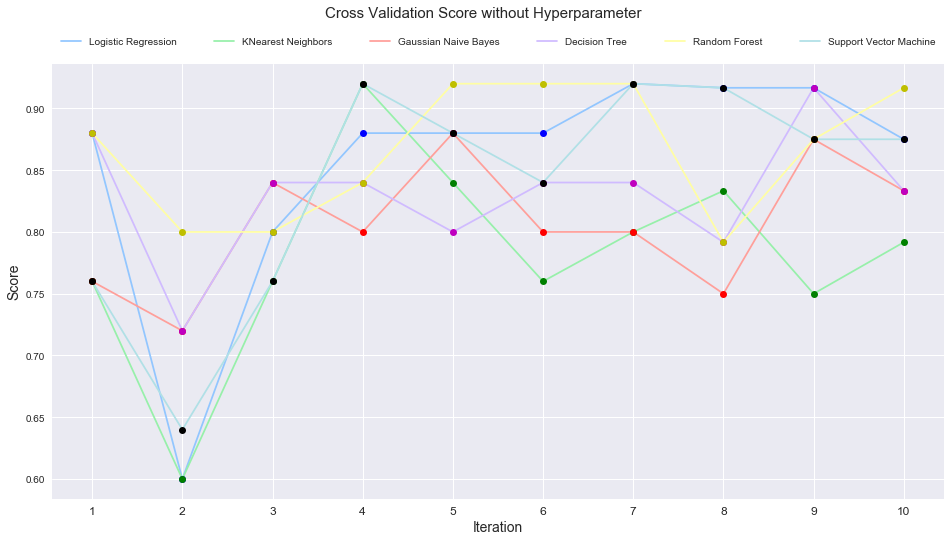

In [307]:
iterasi = [*range(1,11,1)]
plt.style.use('seaborn-pastel')
plt.figure('Cross Validation',figsize=(16,8))
plt.grid('True')
plt.plot(iterasi,scorecvLR0,label='Logistic Regression')
plt.plot(iterasi,scorecvKNC0,label='KNearest Neighbors')
plt.plot(iterasi,scorecvGNB0,label='Gaussian Naive Bayes')
plt.plot(iterasi,scorecvDTC0,label='Decision Tree')
plt.plot(iterasi,scorecvRFC0,label='Random Forest')
plt.plot(iterasi,scorecvSVC0,label='Support Vector Machine')
plt.plot(iterasi,scorecvLR0,'bo')
plt.plot(iterasi,scorecvKNC0,'go')
plt.plot(iterasi,scorecvGNB0,'ro')
plt.plot(iterasi,scorecvDTC0,'mo')
plt.plot(iterasi,scorecvRFC0,'yo')
plt.plot(iterasi,scorecvSVC0,'ko')
plt.xlabel('Iteration',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.suptitle('Cross Validation Score without Hyperparameter',fontsize=15)
plt.xticks(iterasi,fontsize=12)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=6, mode="expand")

In [358]:
dfCV0 = pd.DataFrame(
{"Classification Models" : cols,
"CV Score without Hyperparameter (%)" : [cvLR_mean0, cvKNC_mean0, cvGNB_mean0, cvDTC_mean0, cvRFC_mean0, cvSVC_mean0]},
index = [1,2,3,4,5,6])

In [359]:
dfCV0 = dfCV0.sort_values('CV Score without Hyperparameter (%)')
dfCV0

,Classification Models,CV Score without Hyperparameter (%)
2,KNearest Neighbors,78.15
3,Gaussian Naive Bayes,80.58
4,Decision Tree,83.02
6,Support Vector Machine,83.87
1,Logistic Regression,85.48
5,Random Forest,86.63


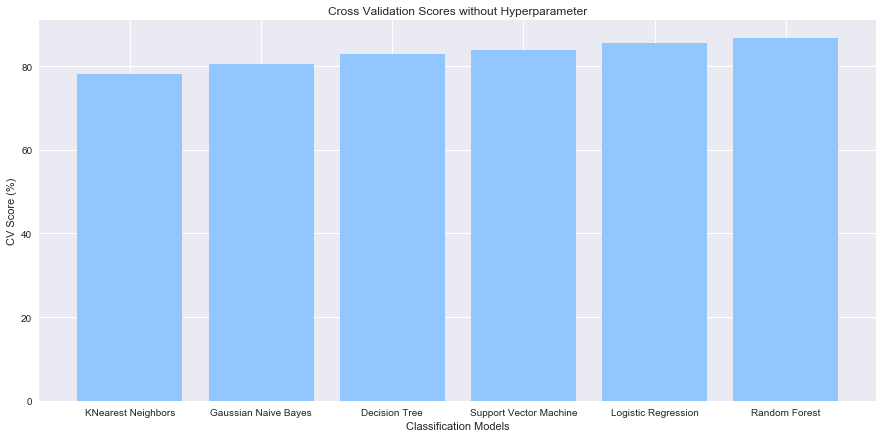

In [356]:
plt.figure(figsize=(15,7))
plt.bar(dfCV0['Classification Models'], dfCV0['CV Score without Hyperparameter Models (%)'])
plt.title('Cross Validation Scores without Hyperparameter')
plt.xlabel('Classification Models')
plt.ylabel('CV Score (%)')
plt.show()

### Cross Validation with Hyperparameters

### - Logistic Regression

In [328]:
scorecvLR = cross_val_score(lrRS, xtr, ytr, cv=10)
print(scorecvLR)

[0.88       0.6        0.8        0.88       0.88       0.88
 0.92       0.91666667 0.91666667 0.875     ]
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of  

In [329]:
cvLR_mean = round(np.mean(scorecvLR*100),2)
cvLR_mean

85.48

### - KNearest Neighbors

In [330]:
scorecvKNC = cross_val_score(kncRS, xtr, ytr, cv=10)
scorecvKNC

array([0.8       , 0.48      , 0.72      , 0.92      , 0.8       ,
       0.72      , 0.88      , 0.95833333, 0.79166667, 0.875     ])

In [331]:
cvKNC_mean = round(np.mean(scorecvKNC*100),2)
cvKNC_mean

79.45

### - Gaussian NB

In [333]:
scorecvGNB = cross_val_score(gnbDef, xtr, ytr, cv=10)
scorecvGNB

array([0.76      , 0.72      , 0.84      , 0.8       , 0.88      ,
       0.8       , 0.8       , 0.75      , 0.875     , 0.83333333])

In [334]:
cvGNB_mean = round(np.mean(scorecvGNB*100),2)
cvGNB_mean

80.58

### - Decision Tree

In [335]:
scorecvDTC = cross_val_score(dtcRS, xtr, ytr, cv=10)
scorecvDTC

array([0.68      , 0.68      , 0.68      , 0.8       , 0.8       ,
       0.8       , 0.76      , 0.66666667, 0.83333333, 0.79166667])

In [336]:
cvDTC_mean = round(np.mean(scorecvDTC*100),2)
cvDTC_mean

74.92

In [346]:
scorecvRFC = cross_val_score(rfcRS, xtr, ytr, cv=10)
print(scorecvRFC)

00
building tree 670 of 700
building tree 671 of 700
building tree 672 of 700
building tree 673 of 700
building tree 674 of 700
building tree 675 of 700
building tree 676 of 700
building tree 677 of 700
building tree 678 of 700
building tree 679 of 700
building tree 680 of 700
building tree 681 of 700
building tree 682 of 700
building tree 683 of 700
building tree 684 of 700
building tree 685 of 700
building tree 686 of 700
building tree 687 of 700
building tree 688 of 700
building tree 689 of 700
building tree 690 of 700
building tree 691 of 700
building tree 692 of 700
building tree 693 of 700
building tree 694 of 700
building tree 695 of 700
building tree 696 of 700
building tree 697 of 700
building tree 698 of 700
building tree 699 of 700
building tree 700 of 700
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:

In [348]:
cvRFC_mean = round(np.mean(scorecvRFC*100),2)
cvRFC_mean

77.37

### - Support Vector Machine

In [343]:
scorecvSVC = cross_val_score(svcRS, xtr, ytr, cv=10)
scorecvSVC

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

array([0.88      , 0.64      , 0.8       , 0.88      , 0.88      ,
       0.88      , 0.96      , 0.91666667, 0.875     , 0.875     ])

In [347]:
cvSVC_mean = round(np.mean(scorecvSVC*100),2)
cvSVC_mean

85.87

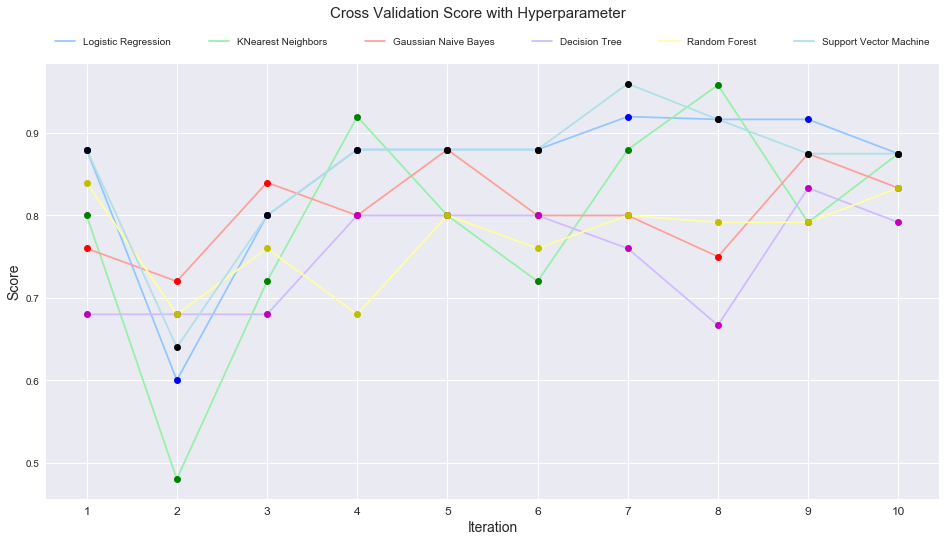

In [350]:
iterasi = [*range(1,11,1)]
plt.style.use('seaborn-pastel')
plt.figure('Cross Validation',figsize=(16,8))
plt.grid('True')
plt.plot(iterasi,scorecvLR,label='Logistic Regression')
plt.plot(iterasi,scorecvKNC,label='KNearest Neighbors')
plt.plot(iterasi,scorecvGNB,label='Gaussian Naive Bayes')
plt.plot(iterasi,scorecvDTC,label='Decision Tree')
plt.plot(iterasi,scorecvRFC,label='Random Forest')
plt.plot(iterasi,scorecvSVC,label='Support Vector Machine')
plt.plot(iterasi,scorecvLR,'bo')
plt.plot(iterasi,scorecvKNC,'go')
plt.plot(iterasi,scorecvGNB,'ro')
plt.plot(iterasi,scorecvDTC,'mo')
plt.plot(iterasi,scorecvRFC,'yo')
plt.plot(iterasi,scorecvSVC,'ko')
plt.xlabel('Iteration',fontsize=14)
plt.ylabel('Score',fontsize=14)
plt.suptitle('Cross Validation Score with Hyperparameter',fontsize=15)
plt.xticks(iterasi,fontsize=12)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=6, mode="expand")

In [360]:
dfCV = pd.DataFrame(
{"Classification Models" : cols,
"CV Score with Hyperparameters (%)" : [cvLR_mean, cvKNC_mean, cvGNB_mean, cvDTC_mean, cvRFC_mean, cvSVC_mean]},
index = [1,2,3,4,5,6])

In [362]:
dfCV = dfCV.sort_values('CV Score with Hyperparameters (%)')
dfCV

,Classification Models,CV Score with Hyperparameters (%)
4,Decision Tree,74.92
5,Random Forest,77.37
2,KNearest Neighbors,79.45
3,Gaussian Naive Bayes,80.58
1,Logistic Regression,85.48
6,Support Vector Machine,85.87


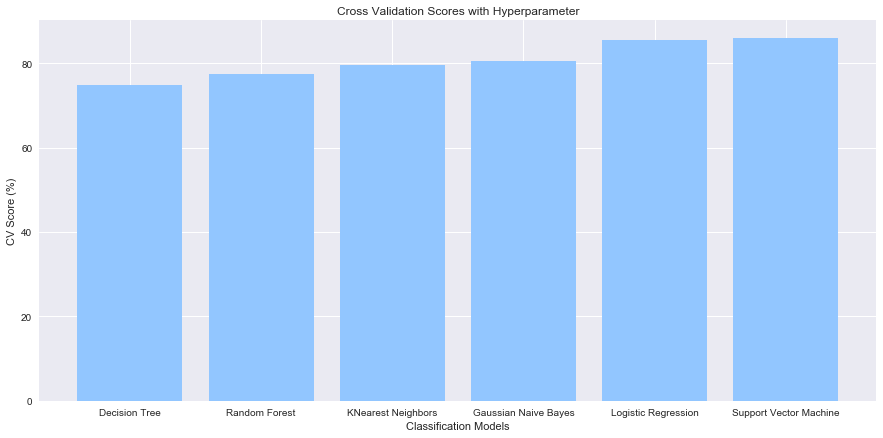

In [365]:
plt.figure(figsize=(15,7))
plt.bar(dfCV['Classification Models'], dfCV['CV Score with Hyperparameters (%)'])
plt.title('Cross Validation Scores with Hyperparameter')
plt.xlabel('Classification Models')
plt.ylabel('CV Score (%)')
plt.show()

In [369]:
dfCV_compare = dfCV0
dfCV_compare['CV Score with Hyperparameters (%)'] = dfCV['CV Score with Hyperparameters (%)']
dfCV_compare

,Classification Models,CV Score without Hyperparameter (%),CV Score with Hyperparameters (%)
2,KNearest Neighbors,78.15,79.45
3,Gaussian Naive Bayes,80.58,80.58
4,Decision Tree,83.02,74.92
6,Support Vector Machine,83.87,85.87
1,Logistic Regression,85.48,85.48
5,Random Forest,86.63,77.37


Berdaasarkan Nilai dan Cross Validation yang dilakukan, maka Model KNearest Neighbors, Support Vector Machine, dan Logistic Regression menggunakan Model dengan Hyperparameter, sedangkan Decision Tree dan Random Forest menggunakan Model secara default, sementara Gaussian Naive Bayes tidak memiliki Hyperparameter.

### Predict

In [370]:
ypLR = lrRS.predict(xts)
ypKNC = kncRS.predict(xts)
ypGNB = gnbDef.predict(xts)
ypDTC = dtcDef.predict(xts)
ypRFC = rfcDef.predict(xts)
ypSVC = svcRS.predict(xts)

## Confusion Matrix

### - Logistic Regression

In [371]:
cmLR = confusion_matrix(yts, ypLR)
dfConLR = pd.DataFrame(cmLR, columns=['Hernia','Normal','Spondylolisthesis'], index=['Hernia','Normal','Spondylolisthesis'])
dfConLR

,Hernia,Normal,Spondylolisthesis
Hernia,5,6,0
Normal,2,19,0
Spondylolisthesis,0,0,30


In [397]:
### Hernia
tp_0_LR = 5
tn_0_LR = 49
fp_0_LR = 2
fn_0_LR = 6

In [398]:
### Normal
tp_1_LR = 19
tn_1_LR = 35
fp_1_LR = 6
fn_1_LR = 2

In [399]:
### Spondylolisthesis
tp_2_LR = 30
tn_2_LR = 32
fp_2_LR = 0
fn_2_LR = 0

### - KNearest Neighbors

In [378]:
cmKNC = confusion_matrix(yts, ypKNC)
dfConKNC = pd.DataFrame(cmKNC, columns=['Hernia','Normal','Spondylolisthesis'], index=['Hernia','Normal','Spondylolisthesis'])
dfConKNC

,Hernia,Normal,Spondylolisthesis
Hernia,6,5,0
Normal,3,18,0
Spondylolisthesis,0,1,29


In [400]:
### Hernia
tp_0_KNC = 6
tn_0_KNC = 48
fp_0_KNC = 3
fn_0_KNC = 5

In [401]:
### Normal
tp_1_KNC = 18
tn_1_KNC = 35
fp_1_KNC = 6
fn_1_KNC = 3

In [402]:
### Spondylolisthesis
tp_2_KNC = 29
tn_2_KNC = 32
fp_2_KNC = 0
fn_2_KNC = 1

### - Gaussian Naive Bayes

In [382]:
cmGNB = confusion_matrix(yts, ypGNB)
dfConGNB = pd.DataFrame(cmGNB, columns=['Hernia','Normal','Spondylolisthesis'], index=['Hernia','Normal','Spondylolisthesis'])
dfConGNB

,Hernia,Normal,Spondylolisthesis
Hernia,8,3,0
Normal,5,16,0
Spondylolisthesis,0,0,30


In [403]:
### Hernia
tp_0_GNB = 8
tn_0_GNB = 46
fp_0_GNB = 5
fn_0_GNB = 3

In [404]:
### Normal
tp_1_GNB = 16
tn_1_GNB = 38
fp_1_GNB = 3
fn_1_GNB = 5

In [405]:
### Spondylolisthesis
tp_2_GNB = 30
tn_2_GNB = 32
fp_2_GNB = 0
fn_2_GNB = 0

### - Decision Tree

In [389]:
cmDTC = confusion_matrix(yts, ypDTC)
dfConDTC = pd.DataFrame(cmDTC, columns=['Hernia','Normal','Spondylolisthesis'], index=['Hernia','Normal','Spondylolisthesis'])
dfConDTC

,Hernia,Normal,Spondylolisthesis
Hernia,5,6,0
Normal,7,13,1
Spondylolisthesis,0,0,30


In [406]:
### Hernia
tp_0_DTC = 5
tn_0_DTC = 44
fp_0_DTC = 7
fn_0_DTC = 6

In [407]:
### Normal
tp_1_DTC = 13
tn_1_DTC = 35
fp_1_DTC = 6
fn_1_DTC = 8

In [408]:
### Spondylolisthesis
tp_2_DTC = 30
tn_2_DTC = 31
fp_2_DTC = 1
fn_2_DTC = 0

### - Random Forest

In [391]:
cmRFC = confusion_matrix(yts, ypRFC)
dfConRFC = pd.DataFrame(cmRFC, columns=['Hernia','Normal','Spondylolisthesis'], index=['Hernia','Normal','Spondylolisthesis'])
dfConRFC

,Hernia,Normal,Spondylolisthesis
Hernia,6,5,0
Normal,5,15,1
Spondylolisthesis,0,0,30


In [409]:
### Hernia
tp_0_RFC = 6
tn_0_RFC = 46
fp_0_RFC = 5
fn_0_RFC = 5

In [410]:
### Normal
tp_1_RFC = 15
tn_1_RFC = 36
fp_1_RFC = 5
fn_1_RFC = 6

In [411]:
### Spondylolisthesis
tp_2_RFC = 30
tn_2_RFC = 31
fp_2_RFC = 1
fn_2_RFC = 0

### - Support Vector Machine

In [395]:
cmSVC = confusion_matrix(yts, ypSVC)
dfConSVC = pd.DataFrame(cmSVC, columns=['Hernia','Normal','Spondylolisthesis'], index=['Hernia','Normal','Spondylolisthesis'])
dfConSVC

,Hernia,Normal,Spondylolisthesis
Hernia,7,4,0
Normal,2,18,1
Spondylolisthesis,0,0,30


In [412]:
### Hernia
tp_0_SVC = 7
tn_0_SVC = 49
fp_0_SVC = 2
fn_0_SVC = 4

In [413]:
### Normal
tp_1_SVC = 18
tn_1_SVC = 37
fp_1_SVC = 4
fn_1_SVC = 3

In [414]:
### Spondylolisthesis
tp_2_SVC = 30
tn_2_SVC = 31
fp_2_SVC = 1
fn_2_SVC = 0

(3, -0.05)

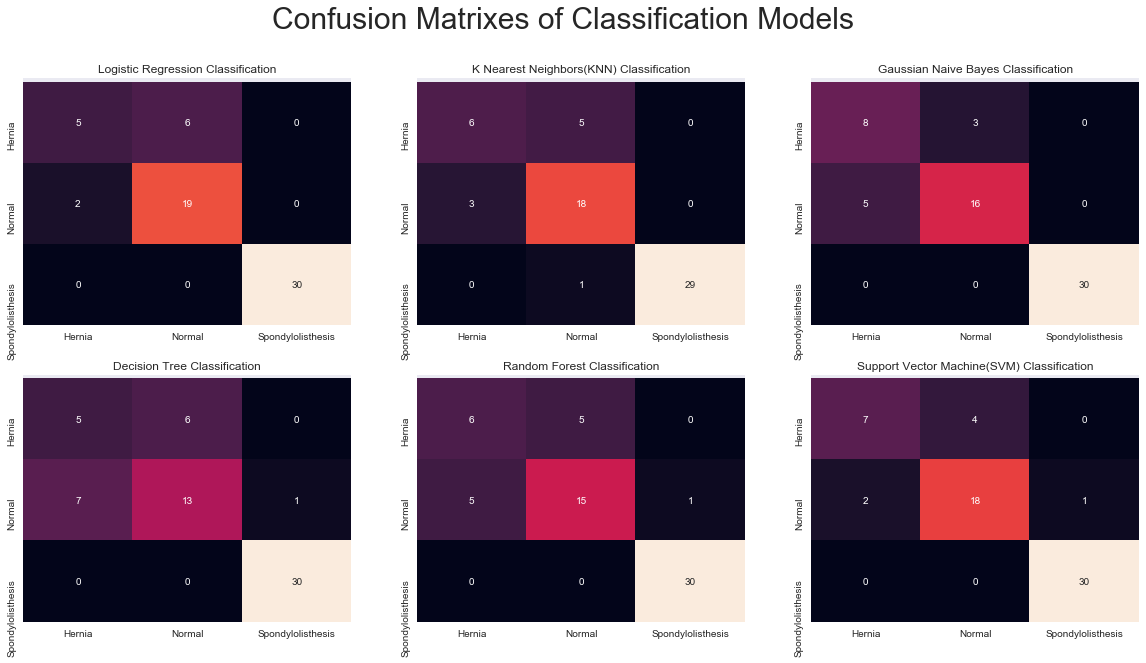

In [415]:
plt.figure(figsize=(20,10))
plt.suptitle("Confusion Matrixes of Classification Models",fontsize=30)

plt.subplot(231)
plt.title("Logistic Regression Classification")
sb.heatmap(dfConLR, annot=True, fmt='d', cbar=False)
plt.ylim(3,-0.05)

plt.subplot(232)
plt.title("K Nearest Neighbors(KNN) Classification")
sb.heatmap(dfConKNC, annot=True, fmt='d', cbar=False)
plt.ylim(3,-0.05)

plt.subplot(233)
plt.title("Gaussian Naive Bayes Classification")
sb.heatmap(dfConGNB, annot=True, fmt='d', cbar=False)
plt.ylim(3,-0.05)

plt.subplot(234)
plt.title("Decision Tree Classification")
sb.heatmap(dfConDTC, annot=True, fmt='d', cbar=False)
plt.ylim(3,-0.05)

plt.subplot(235)
plt.title("Random Forest Classification")
sb.heatmap(dfConRFC, annot=True, fmt='d', cbar=False)
plt.ylim(3,-0.05)

plt.subplot(236)
plt.title("Support Vector Machine(SVM) Classification")
sb.heatmap(dfConSVC, annot=True, fmt='d', cbar=False)
plt.ylim(3,-0.05)

### Accuracy

### - Logistic Regression

In [423]:
accLR_hernia = round((tp_0_LR+tn_0_LR)/len(xts)*100,2)
accLR_normal = round((tp_1_LR+tn_1_LR)/len(xts)*100,2)
accLR_spondy = round((tp_2_LR+tn_2_LR)/len(xts)*100,2)

print(f'Accuracy Score (Hernia) of Logistic Regression: {accLR_hernia} %')
print(f'Accuracy Score (Normal) of Logistic Regression: {accLR_normal} %')
print(f'Accuracy Score (Spondylolisthesis) of Logistic Regression: {accLR_spondy} %')

Accuracy Score (Hernia) of Logistic Regression: 87.1 %
Accuracy Score (Normal) of Logistic Regression: 87.1 %
Accuracy Score (Spondylolisthesis) of Logistic Regression: 100.0 %


### - KNearest Neighbors

In [424]:
accKNC_hernia = round((tp_0_KNC+tn_0_KNC)/len(xts)*100,2)
accKNC_normal = round((tp_1_KNC+tn_1_KNC)/len(xts)*100,2)
accKNC_spondy = round((tp_2_KNC+tn_2_KNC)/len(xts)*100,2)

print(f'Accuracy Score (Hernia) of KNearest Neighbors: {accKNC_hernia} %')
print(f'Accuracy Score (Normal) of KNearest Neighbors: {accKNC_normal} %')
print(f'Accuracy Score (Spondylolisthesis) of KNearest Neighbors: {accKNC_spondy} %')

Accuracy Score (Hernia) of KNearest Neighbors: 87.1 %
Accuracy Score (Normal) of KNearest Neighbors: 85.48 %
Accuracy Score (Spondylolisthesis) of KNearest Neighbors: 98.39 %


In [504]:
accKNC = round(accuracy_score(yts, ypKNC)*100,2)
accKNC

85.48

### - Gaussian Naive Bayes

In [425]:
accGNB_hernia = round((tp_0_GNB+tn_0_GNB)/len(xts)*100,2)
accGNB_normal = round((tp_1_GNB+tn_1_GNB)/len(xts)*100,2)
accGNB_spondy = round((tp_2_GNB+tn_2_GNB)/len(xts)*100,2)

print(f'Accuracy Score (Hernia) of Gaussian Naive Bayes: {accGNB_hernia} %')
print(f'Accuracy Score (Normal) of Gaussian Naive Bayes: {accGNB_normal} %')
print(f'Accuracy Score (Spondylolisthesis) of Gaussian Naive Bayes: {accGNB_spondy} %')

Accuracy Score (Hernia) of Gaussian Naive Bayes: 87.1 %
Accuracy Score (Normal) of Gaussian Naive Bayes: 87.1 %
Accuracy Score (Spondylolisthesis) of Gaussian Naive Bayes: 100.0 %


### - Decision Tree Classifier

In [427]:
accDTC_hernia = round((tp_0_DTC+tn_0_DTC)/len(xts)*100,2)
accDTC_normal = round((tp_1_DTC+tn_1_DTC)/len(xts)*100,2)
accDTC_spondy = round((tp_2_DTC+tn_2_DTC)/len(xts)*100,2)

print(f'Accuracy Score (Hernia) of Decision Tree: {accDTC_hernia} %')
print(f'Accuracy Score (Normal) of Decision Tree: {accDTC_normal} %')
print(f'Accuracy Score (Spondylolisthesis) of Decision Tree: {accDTC_spondy} %')

Accuracy Score (Hernia) of Decision Tree: 79.03 %
Accuracy Score (Normal) of Decision Tree: 77.42 %
Accuracy Score (Spondylolisthesis) of Decision Tree: 98.39 %


### - Random Forest

In [428]:
accRFC_hernia = round((tp_0_RFC+tn_0_RFC)/len(xts)*100,2)
accRFC_normal = round((tp_1_RFC+tn_1_RFC)/len(xts)*100,2)
accRFC_spondy = round((tp_2_RFC+tn_2_RFC)/len(xts)*100,2)

print(f'Accuracy Score (Hernia) of Random Forest: {accRFC_hernia} %')
print(f'Accuracy Score (Normal) of Random Forest: {accRFC_normal} %')
print(f'Accuracy Score (Spondylolisthesis) of Random Forest: {accRFC_spondy} %')

Accuracy Score (Hernia) of Random Forest: 83.87 %
Accuracy Score (Normal) of Random Forest: 82.26 %
Accuracy Score (Spondylolisthesis) of Random Forest: 98.39 %


### - Support Vector Machine

In [431]:
accSVC_hernia = round((tp_0_SVC+tn_0_SVC)/len(xts)*100,2)
accSVC_normal = round((tp_1_SVC+tn_1_SVC)/len(xts)*100,2)
accSVC_spondy = round((tp_2_SVC+tn_2_SVC)/len(xts)*100,2)

print(f'Accuracy Score (Hernia) of Random Forest: {accSVC_hernia} %')
print(f'Accuracy Score (Normal) of Random Forest: {accSVC_normal} %')
print(f'Accuracy Score (Spondylolisthesis) of Random Forest: {accSVC_spondy} %')

Accuracy Score (Hernia) of Random Forest: 90.32 %
Accuracy Score (Normal) of Random Forest: 88.71 %
Accuracy Score (Spondylolisthesis) of Random Forest: 98.39 %


### Precision Score

### - Logistic Regression

In [449]:
pLR_hernia = round(tp_0_LR/(tp_0_LR+fp_0_LR)*100,2)
pLR_normal = round(tp_1_LR/(tp_1_LR+fp_1_LR)*100,2)
pLR_spondy = round(tp_2_LR/(tp_2_LR+fp_2_LR)*100,2)

print(f'Precision (Hernia): {pLR_hernia} %')
print(f'Precision (Normal): {pLR_normal} %')
print(f'Precision (Spondylolisthesis): {pLR_spondy} %')

Precision (Hernia): 71.43 %
Precision (Normal): 76.0 %
Precision (Spondylolisthesis): 100.0 %


### - KNearest Neighbors

In [450]:
pKNC_hernia = round(tp_0_KNC/(tp_0_KNC+fp_0_KNC)*100,2)
pKNC_normal = round(tp_1_KNC/(tp_1_KNC+fp_1_KNC)*100,2)
pKNC_spondy = round(tp_2_KNC/(tp_2_KNC+fp_2_KNC)*100,2)

print(f'Precision (Hernia): {pKNC_hernia} %')
print(f'Precision (Normal): {pKNC_normal} %')
print(f'Precision (Spondylolisthesis): {pKNC_spondy} %')

Precision (Hernia): 66.67 %
Precision (Normal): 75.0 %
Precision (Spondylolisthesis): 100.0 %


### - Gausssian Naive Bayes

In [451]:
pGNB_hernia = round(tp_0_GNB/(tp_0_GNB+fp_0_GNB)*100,2)
pGNB_normal = round(tp_1_GNB/(tp_1_GNB+fp_1_GNB)*100,2)
pGNB_spondy = round(tp_2_GNB/(tp_2_GNB+fp_2_GNB)*100,2)

print(f'Precision (Hernia): {pGNB_hernia} %')
print(f'Precision (Normal): {pGNB_normal} %')
print(f'Precision (Spondylolisthesis): {pGNB_spondy} %')

Precision (Hernia): 61.54 %
Precision (Normal): 84.21 %
Precision (Spondylolisthesis): 100.0 %


### - Decision Tree

In [452]:
pDTC_hernia = round(tp_0_DTC/(tp_0_DTC+fp_0_DTC)*100,2)
pDTC_normal = round(tp_1_DTC/(tp_1_DTC+fp_1_DTC)*100,2)
pDTC_spondy = round(tp_2_DTC/(tp_2_DTC+fp_2_DTC)*100,2)

print(f'Precision (Hernia): {pDTC_hernia} %')
print(f'Precision (Normal): {pDTC_normal} %')
print(f'Precision (Spondylolisthesis): {pDTC_spondy} %')

Precision (Hernia): 41.67 %
Precision (Normal): 68.42 %
Precision (Spondylolisthesis): 96.77 %


### - Random Forest

In [453]:
pRFC_hernia = round(tp_0_RFC/(tp_0_RFC+fp_0_RFC)*100,2)
pRFC_normal = round(tp_1_RFC/(tp_1_RFC+fp_1_RFC)*100,2)
pRFC_spondy = round(tp_2_RFC/(tp_2_RFC+fp_2_RFC)*100,2)

print(f'Precision (Hernia): {pRFC_hernia} %')
print(f'Precision (Normal): {pRFC_normal} %')
print(f'Precision (Spondylolisthesis): {pRFC_spondy} %')

Precision (Hernia): 54.55 %
Precision (Normal): 75.0 %
Precision (Spondylolisthesis): 96.77 %


### - Support Vector Machine

In [455]:
pSVC_hernia = round(tp_0_SVC/(tp_0_SVC+fp_0_SVC)*100,2)
pSVC_normal = round(tp_1_SVC/(tp_1_SVC+fp_1_SVC)*100,2)
pSVC_spondy = round(tp_2_SVC/(tp_2_SVC+fp_2_SVC)*100,2)

print(f'Precision (Hernia): {pSVC_hernia} %')
print(f'Precision (Normal): {pSVC_normal} %')
print(f'Precision (Spondylolisthesis): {pSVC_spondy} %')

Precision (Hernia): 77.78 %
Precision (Normal): 81.82 %
Precision (Spondylolisthesis): 96.77 %


### Recall

### - Logistic Regression

In [457]:
rLR_hernia = round(tp_0_LR/(tp_0_LR+fn_0_LR)*100,2)
rLR_normal = round(tp_1_LR/(tp_1_LR+fn_1_LR)*100,2)
rLR_spondy = round(tp_2_LR/(tp_2_LR+fn_2_LR)*100,2)

print(f'Precision (Hernia): {rLR_hernia} %')
print(f'Precision (Normal): {rLR_normal} %')
print(f'Precision (Spondylolisthesis): {rLR_spondy} %')

Precision (Hernia): 45.45 %
Precision (Normal): 90.48 %
Precision (Spondylolisthesis): 100.0 %



### - KNearest Neighbors

In [458]:
rKNC_hernia = round(tp_0_KNC/(tp_0_KNC+fn_0_KNC)*100,2)
rKNC_normal = round(tp_1_KNC/(tp_1_KNC+fn_1_KNC)*100,2)
rKNC_spondy = round(tp_2_KNC/(tp_2_KNC+fn_2_KNC)*100,2)

print(f'Precision (Hernia): {rKNC_hernia} %')
print(f'Precision (Normal): {rKNC_normal} %')
print(f'Precision (Spondylolisthesis): {rKNC_spondy} %')

Precision (Hernia): 54.55 %
Precision (Normal): 85.71 %
Precision (Spondylolisthesis): 96.67 %


### - Gaussian Naive Bayes

In [459]:
rGNB_hernia = round(tp_0_GNB/(tp_0_GNB+fn_0_GNB)*100,2)
rGNB_normal = round(tp_1_GNB/(tp_1_GNB+fn_1_GNB)*100,2)
rGNB_spondy = round(tp_2_GNB/(tp_2_GNB+fn_2_GNB)*100,2)

print(f'Precision (Hernia): {rGNB_hernia} %')
print(f'Precision (Normal): {rGNB_normal} %')
print(f'Precision (Spondylolisthesis): {rGNB_spondy} %')

Precision (Hernia): 72.73 %
Precision (Normal): 76.19 %
Precision (Spondylolisthesis): 100.0 %


### - Decision Tree

In [461]:
rDTC_hernia = round(tp_0_DTC/(tp_0_DTC+fn_0_DTC)*100,2)
rDTC_normal = round(tp_1_DTC/(tp_1_DTC+fn_1_DTC)*100,2)
rDTC_spondy = round(tp_2_DTC/(tp_2_DTC+fn_2_DTC)*100,2)

print(f'Accuracy Score (Hernia) of Decision Tree: {rDTC_hernia} %')
print(f'Accuracy Score (Normal) of Decision Tree: {rDTC_normal} %')
print(f'Accuracy Score (Spondylolisthesis) of Decision Tree: {rDTC_spondy} %')

Accuracy Score (Hernia) of Decision Tree: 45.45 %
Accuracy Score (Normal) of Decision Tree: 61.9 %
Accuracy Score (Spondylolisthesis) of Decision Tree: 100.0 %


### - Random Forest

In [462]:
rRFC_hernia = round(tp_0_RFC/(tp_0_RFC+fn_0_RFC)*100,2)
rRFC_normal = round(tp_1_RFC/(tp_1_RFC+fn_1_RFC)*100,2)
rRFC_spondy = round(tp_2_RFC/(tp_2_RFC+fn_2_RFC)*100,2)

print(f'Precision (Hernia): {rRFC_hernia} %')
print(f'Precision (Normal): {rRFC_normal} %')
print(f'Precision (Spondylolisthesis): {rRFC_spondy} %')

Precision (Hernia): 54.55 %
Precision (Normal): 71.43 %
Precision (Spondylolisthesis): 100.0 %


### - Super Vector Machine

In [460]:
rSVC_hernia = round(tp_0_SVC/(tp_0_SVC+fn_0_SVC)*100,2)
rSVC_normal = round(tp_1_SVC/(tp_1_SVC+fn_1_SVC)*100,2)
rSVC_spondy = round(tp_2_SVC/(tp_2_SVC+fn_2_SVC)*100,2)

print(f'Precision (Hernia): {rSVC_hernia} %')
print(f'Precision (Normal): {rSVC_normal} %')
print(f'Precision (Spondylolisthesis): {rSVC_spondy} %')

Precision (Hernia): 63.64 %
Precision (Normal): 85.71 %
Precision (Spondylolisthesis): 100.0 %


### Classsification Report

### - Logistic Regression

In [464]:
crLR = classification_report(yts, ypLR)
print(crLR)

precision    recall  f1-score   support

           Hernia       0.71      0.45      0.56        11
           Normal       0.76      0.90      0.83        21
Spondylolisthesis       1.00      1.00      1.00        30

         accuracy                           0.87        62
        macro avg       0.82      0.79      0.79        62
     weighted avg       0.87      0.87      0.86        62



### - KNearest Neighbors

In [465]:
crKNC = classification_report(yts, ypKNC)
print(crKNC)

precision    recall  f1-score   support

           Hernia       0.67      0.55      0.60        11
           Normal       0.75      0.86      0.80        21
Spondylolisthesis       1.00      0.97      0.98        30

         accuracy                           0.85        62
        macro avg       0.81      0.79      0.79        62
     weighted avg       0.86      0.85      0.85        62



### - Gaussian Naive Bayes

In [466]:
crGNB = classification_report(yts, ypGNB)
print(crGNB)

precision    recall  f1-score   support

           Hernia       0.62      0.73      0.67        11
           Normal       0.84      0.76      0.80        21
Spondylolisthesis       1.00      1.00      1.00        30

         accuracy                           0.87        62
        macro avg       0.82      0.83      0.82        62
     weighted avg       0.88      0.87      0.87        62



### - Decision Tree

In [467]:
crDTC = classification_report(yts, ypDTC)
print(crDTC)

precision    recall  f1-score   support

           Hernia       0.42      0.45      0.43        11
           Normal       0.68      0.62      0.65        21
Spondylolisthesis       0.97      1.00      0.98        30

         accuracy                           0.77        62
        macro avg       0.69      0.69      0.69        62
     weighted avg       0.77      0.77      0.77        62



### - Random Forest

In [468]:
crRFC = classification_report(yts, ypRFC)
print(crRFC)

precision    recall  f1-score   support

           Hernia       0.55      0.55      0.55        11
           Normal       0.75      0.71      0.73        21
Spondylolisthesis       0.97      1.00      0.98        30

         accuracy                           0.82        62
        macro avg       0.75      0.75      0.75        62
     weighted avg       0.82      0.82      0.82        62



### - Support Vector Machine

In [469]:
crSVC = classification_report(yts, ypSVC)
print(crSVC)

precision    recall  f1-score   support

           Hernia       0.78      0.64      0.70        11
           Normal       0.82      0.86      0.84        21
Spondylolisthesis       0.97      1.00      0.98        30

         accuracy                           0.89        62
        macro avg       0.85      0.83      0.84        62
     weighted avg       0.88      0.89      0.88        62



### - Jacard Score

In [471]:
jLR = round(jaccard_score(yts, ypLR, average='macro')*100,2)
jKNC = round(jaccard_score(yts, ypKNC, average='macro')*100,2)
jGNB = round(jaccard_score(yts, ypGNB, average='macro')*100,2)
jDTC = round(jaccard_score(yts, ypDTC, average='macro')*100,2)
jRFC = round(jaccard_score(yts, ypRFC, average='macro')*100,2)
jSVC = round(jaccard_score(yts, ypSVC, average='macro')*100,2)
print(f'Jaccard Score of Logistic Regression Model: {jLR} %')
print(f'Jaccard Score of KNearest Neighbors Model: {jKNC} %')
print(f'Jaccard Score of Gaussian Naive Bayes Model: {jGNB} %')
print(f'Jaccard Score of Decision Tree Model: {jDTC} %')
print(f'Jaccard Score of Random Forest Model: {jRFC} %')
print(f'Jaccard Score of Support Vector Machine Model: {jSVC} %')

Jaccard Score of Logistic Regression Model: 69.61 %
Jaccard Score of KNearest Neighbors Model: 68.73 %
Jaccard Score of Gaussian Naive Bayes Model: 72.22 %
Jaccard Score of Decision Tree Model: 57.57 %
Jaccard Score of Random Forest Model: 63.99 %
Jaccard Score of Support Vector Machine Model: 74.21 %


In [475]:
dfJ = pd.DataFrame(
{"Classification Models" : cols,
"Jaccard Score (%)" : [jLR, jKNC, jGNB, jDTC, jRFC, jSVC]},
index = [1,2,3,4,5,6])

In [476]:
dfJ = dfJ.sort_values('Jaccard Score (%)')
dfJ

,Classification Models,Jaccard Score (%)
4,Decision Tree,57.57
5,Random Forest,63.99
2,KNearest Neighbors,68.73
1,Logistic Regression,69.61
3,Gaussian Naive Bayes,72.22
6,Support Vector Machine,74.21


### - ROC AUC

In [484]:
a_yts = np.array(yts)
ppLR = lrRS.predict_proba(xts)
ppKNC = kncRS.predict_proba(xts)
ppGNB = gnbDef.predict_proba(xts)
ppDTC = dtcRS.predict_proba(xts)
ppRFC = rfcDef.predict_proba(xts)
ppSVC = svcRS.predict_proba(xts)

In [485]:
raLR = round(roc_auc_score(a_yts, ppLR, multi_class='ovr'),3)
raKNC = round(roc_auc_score(a_yts, ppKNC, multi_class='ovr'),3)
raGNB = round(roc_auc_score(a_yts, ppGNB, multi_class='ovr'),3)
raDTC = round(roc_auc_score(a_yts, ppDTC, multi_class='ovr'),3)
raRFC = round(roc_auc_score(a_yts, ppRFC, multi_class='ovr'),3)
raSVC = round(roc_auc_score(a_yts, ppSVC, multi_class='ovr'),3)

print(f'ROC AUC Score of Logistic Regression Model: {raLR}')
print(f'ROC AUC Score of KNearest Neighbors Model: {raKNC}')
print(f'ROC AUC Score of Gaussian Naive Bayes Model: {raGNB}')
print(f'ROC AUC Score of Decision Tree Model: {raDTC}')
print(f'ROC AUC Score of Random Forest Model: {raRFC}')
print(f'ROC AUC Score of Support Vector Machine Model: {raSVC}')

ROC AUC Score of Logistic Regression Model: 0.965
ROC AUC Score of KNearest Neighbors Model: 0.948
ROC AUC Score of Gaussian Naive Bayes Model: 0.944
ROC AUC Score of Decision Tree Model: 0.876
ROC AUC Score of Random Forest Model: 0.942
ROC AUC Score of Support Vector Machine Model: 0.964


In [486]:
dfRA = pd.DataFrame(
{"Classification Models" : cols,
"ROC AUC Score" : [raLR, raKNC, raGNB, raDTC, raRFC, raSVC]},
index = [1,2,3,4,5,6])

In [487]:
dfRA = dfRA.sort_values('ROC AUC Score')
dfRA

,Classification Models,ROC AUC Score
4,Decision Tree,0.876
5,Random Forest,0.942
3,Gaussian Naive Bayes,0.944
2,KNearest Neighbors,0.948
6,Support Vector Machine,0.964
1,Logistic Regression,0.965


### ROC Curve

In [492]:
y_le = df['class_en']

In [493]:
ylab = label_binarize(y_le, classes=[0,1,2])
n_classes = 3
# print(ylab)

# shuffle and split training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, ylab, test_size=0.2, random_state=21)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(247, 6)
(62, 6)
(247, 3)
(62, 3)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


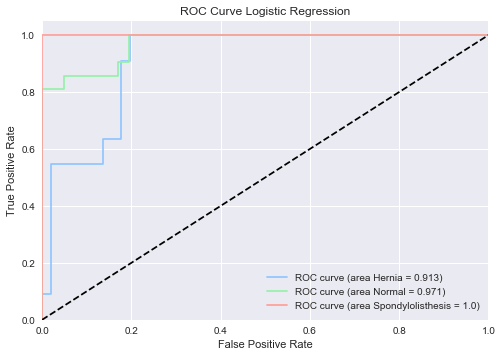

In [494]:
# classifier
clf = OneVsRestClassifier(lrRS)
y_fit = clf.fit(x_train, y_train)
y_score = y_fit.predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
        # print(i)
        fpr[i], tpr[i], th = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        # print(roc_auc[i])

## Plot of a ROC curve for a specific class
# for i in range(n_classes):
plt.figure()
plt.plot(fpr[0], tpr[0], label=f'ROC curve (area Hernia = {round(roc_auc[0],3)})')
plt.plot(fpr[1], tpr[1], label=f'ROC curve (area Normal = {round(roc_auc[1],3)})')
plt.plot(fpr[2], tpr[2], label=f'ROC curve (area Spondylolisthesis = {round(roc_auc[2],3)})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.legend(loc="lower right")
plt.show()

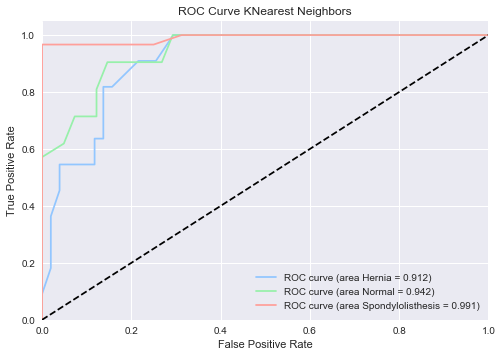

In [495]:
# classifier
clf = OneVsRestClassifier(kncRS)
y_fit = clf.fit(x_train, y_train)
y_score = y_fit.predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
        # print(i)
        fpr[i], tpr[i], th = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        # print(roc_auc[i])

## Plot of a ROC curve for a specific class
# for i in range(n_classes):
plt.figure()
plt.plot(fpr[0], tpr[0], label=f'ROC curve (area Hernia = {round(roc_auc[0],3)})')
plt.plot(fpr[1], tpr[1], label=f'ROC curve (area Normal = {round(roc_auc[1],3)})')
plt.plot(fpr[2], tpr[2], label=f'ROC curve (area Spondylolisthesis = {round(roc_auc[2],3)})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve KNearest Neighbors')
plt.legend(loc="lower right")
plt.show()

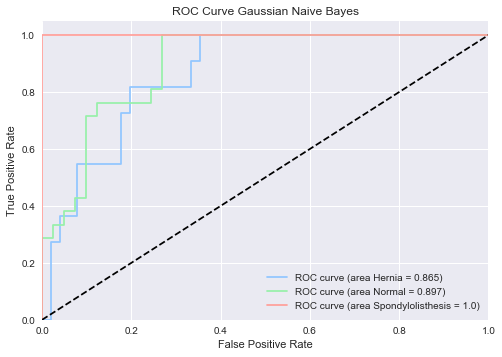

In [496]:
# classifier
clf = OneVsRestClassifier(gnbDef)
y_fit = clf.fit(x_train, y_train)
y_score = y_fit.predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
        # print(i)
        fpr[i], tpr[i], th = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        # print(roc_auc[i])

## Plot of a ROC curve for a specific class
# for i in range(n_classes):
plt.figure()
plt.plot(fpr[0], tpr[0], label=f'ROC curve (area Hernia = {round(roc_auc[0],3)})')
plt.plot(fpr[1], tpr[1], label=f'ROC curve (area Normal = {round(roc_auc[1],3)})')
plt.plot(fpr[2], tpr[2], label=f'ROC curve (area Spondylolisthesis = {round(roc_auc[2],3)})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()

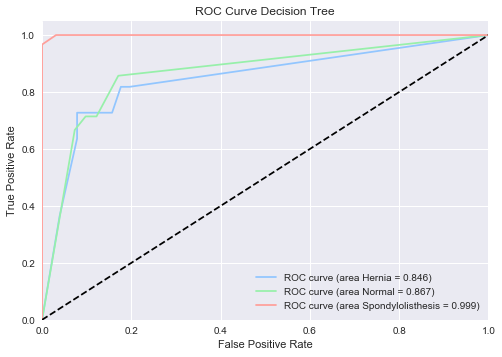

In [497]:
# classifier
clf = OneVsRestClassifier(dtcRS)
y_fit = clf.fit(x_train, y_train)
y_score = y_fit.predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
        # print(i)
        fpr[i], tpr[i], th = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        # print(roc_auc[i])

## Plot of a ROC curve for a specific class
# for i in range(n_classes):
plt.figure()
plt.plot(fpr[0], tpr[0], label=f'ROC curve (area Hernia = {round(roc_auc[0],3)})')
plt.plot(fpr[1], tpr[1], label=f'ROC curve (area Normal = {round(roc_auc[1],3)})')
plt.plot(fpr[2], tpr[2], label=f'ROC curve (area Spondylolisthesis = {round(roc_auc[2],3)})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Decision Tree')
plt.legend(loc="lower right")
plt.show()

In [498]:
# classifier
clf = OneVsRestClassifier(rfcRS)
y_fit = clf.fit(x_train, y_train)
y_score = y_fit.predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
        # print(i)
        fpr[i], tpr[i], th = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        # print(roc_auc[i])

7 of 700
building tree 688 of 700
building tree 689 of 700
building tree 690 of 700
building tree 691 of 700
building tree 692 of 700
building tree 693 of 700
building tree 694 of 700
building tree 695 of 700
building tree 696 of 700
building tree 697 of 700
building tree 698 of 700
building tree 699 of 700
building tree 700 of 700
[Parallel(n_jobs=1)]: Done 700 out of 700 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
building tree 1 of 700
building tree 2 of 700
building tree 3 of 700
building tree 4 of 700
building tree 5 of 700


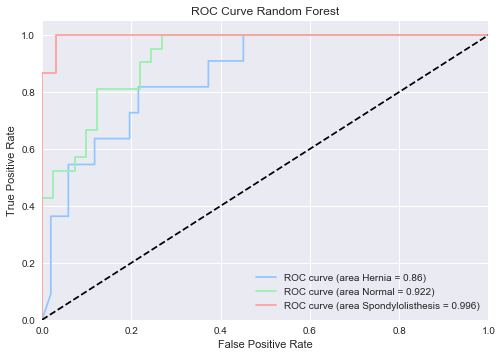

In [499]:
## Plot of a ROC curve for a specific class
# for i in range(n_classes):
plt.figure()
plt.plot(fpr[0], tpr[0], label=f'ROC curve (area Hernia = {round(roc_auc[0],3)})')
plt.plot(fpr[1], tpr[1], label=f'ROC curve (area Normal = {round(roc_auc[1],3)})')
plt.plot(fpr[2], tpr[2], label=f'ROC curve (area Spondylolisthesis = {round(roc_auc[2],3)})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Random Forest')
plt.legend(loc="lower right")
plt.show()

[LibSVM][LibSVM][LibSVM]

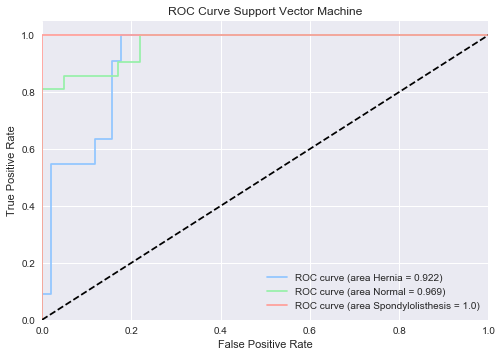

In [500]:
# classifier
clf = OneVsRestClassifier(svcRS)
y_fit = clf.fit(x_train, y_train)
y_score = y_fit.predict_proba(x_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
        # print(i)
        fpr[i], tpr[i], th = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        # print(roc_auc[i])

## Plot of a ROC curve for a specific class
# for i in range(n_classes):
plt.figure()
plt.plot(fpr[0], tpr[0], label=f'ROC curve (area Hernia = {round(roc_auc[0],3)})')
plt.plot(fpr[1], tpr[1], label=f'ROC curve (area Normal = {round(roc_auc[1],3)})')
plt.plot(fpr[2], tpr[2], label=f'ROC curve (area Spondylolisthesis = {round(roc_auc[2],3)})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Support Vector Machine')
plt.legend(loc="lower right")
plt.show()

In [501]:
joblib.dump(svcRS_fit, 'model_svc')

['model_svc']